# Компьютерная графика: домашнее задание
## Божнюк Александр Сергеевич, 371 группа

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

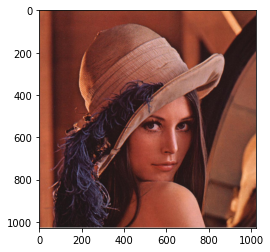

In [3]:
# Подготовка изображения
img_loaded = cv2.imread("test_image.jpeg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Задание 1. Поворот изображения на 45 градусов

Для того, чтобы произвести поворот, необходима матрица поворота. 

**Матрица поворота** - это ортогональная матрица, которая применяется для поворота в евклидовом пространстве. Ее определитель равен единице.
Для поворота вектора необходимо умножить его на матрицу поворота. При этом длина вектора сохраняется.

Матрица поворота в двумерном пространстве:

$M(\theta) = \begin{pmatrix}
cos(\theta) & \mp sin(\theta)\\
\pm sin(\theta) & cos(\theta)
\end{pmatrix}$

Конкретные знаки в формулах зависят от того, является ли система координат правосторонней или левосторонней, и выполняется ли вращение по или против часовой стрелки. Верхний знак указан для обычного соглашения: правосторонняя система координат и вращения против часовой стрелки (тот же знак верен для левосторонней координатной системы при выборе вращения по часовой стрелке; в оставшихся двух комбинациях — нижний знак).

Массив, который испольуется для поворота и смещения, состоит из трех вектор-столбцов. Первые два - матрица поворота, третий - вектор смещения, его первая координата отвечает за смещение по оси абсцисс, а вторая - по оси ординат.

Для поворота на 45 градусов нужно произвести перевод в радианы (для numpy) и подставить в угол в матрицу поворота. Вектор смещения нулевой, так как картинку не требуется смещать.

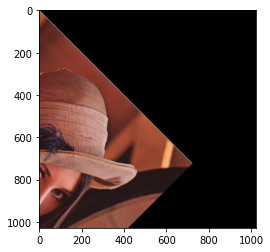

In [4]:
angle = 45 * np.pi / 180
rotate = np.array( [[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0]] ).astype(np.float32)
rotated_img = cv2.warpAffine(img, rotate, dsize=(img.shape[1],img.shape[0]))
plt.imshow(rotated_img)
plt.show()

## Задание 2. Поверот изображения на 30 градусов вокруг заданной точки
Для этого нужно найти координату, где окажется новая точка, полученная после поворота, и поместить её в место старой заданной точки. Это делается путем вычисления разности между координатами точки до поворота и после поворота, самим поворотом, и смещением на полученные разницы.

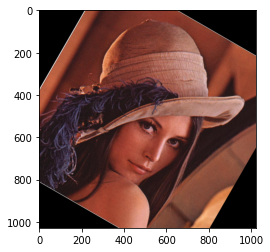

In [5]:
def rotate_around_point(px, py, angle):
    angle_rad = angle * np.pi / 180
    dx = px - (np.cos(angle_rad) * px - np.sin(angle_rad) * py)
    dy = py - (np.sin(angle_rad) * px + np.cos(angle_rad) * py)
    rot = np.array( [[np.cos(angle_rad), -np.sin(angle_rad), dx], [np.sin(angle_rad), np.cos(angle_rad), dy]] ).astype(np.float32)

    rotate_img = cv2.warpAffine(img, rot, dsize=(img.shape[1],img.shape[0]))
    
    return rotate_img
    

rotaded = rotate_around_point(img.shape[0] / 2, img.shape[1] / 2, 30)
plt.imshow(rotaded)
plt.show()

## Задание 3. Смещение изображения на 10 пикселей вправо
Для этого нужно в матрицу поворота подставить угол в 0 градусов (0 радиан), но при этом задать вектор смещения как $(10, 0)^T$.

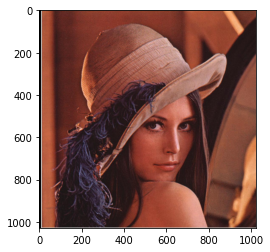

In [6]:
shift = np.array( [[1, 0, 10], [0, 1, 0]] ).astype(np.float32)
shift_img = cv2.warpAffine(img, shift, dsize=(img.shape[1],img.shape[0]))
plt.imshow(shift_img)
plt.show()

## Задание 4. Перевод изображения в HSV
HSV (Hue, Saturation, Value) или HSB (Hue, Saturation, Brightness) - цветовая палитра, в которой координатами цвета являются: 
- **Hue** (цветовой тон, варьируется в диапазоне между 0 и 360 градусов, иногда приводятся к диапазонам 0-100, 0-1), 
- **Saturation** (насыщенность, варьируется в пределах от 0 до 100 или от 0 до 1. Чем ближе параметр к 0, тем цвет ближе к натуральному серому, а чем больше параметр, тем больше "чистота" цвета), 
- **Value или Brighness** (значение или яркость - находится в пределах от 0 до 100 или от 0 до 1).

Данная палитра используется в различных программах, так как её легко визуализировать в виде цветового круга, кольца, цилинда и так далее.

Перевод в цветовую палитру HSV можно осуществить засчет простых средст OpenCV. Это производится засчет применения формул по переводу из одной палитры в другую.

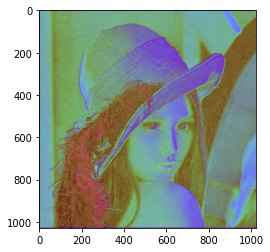

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

## Задание 5. Изменение яркости изображения.

Существует формула, которая позволяет повлиять на яркость и контрастность изображения: 

$g(i,j) = \alpha*f(i,j) + \beta$,
где параметр $\alpha$ влияет на контрастность, а параметр $\beta$ влияет на яркость, $i,j$ - номер строки и столбца пикселя. 
Для того, чтобы поменять яркость изображения, надо к каждому каналу пикселя прибавить значение $\beta$.

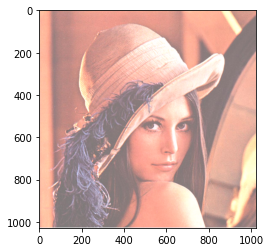

In [20]:
alpha = 1
beta = 100


for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            # держим значения каналов в пределах от 0 до 255
            new_image[y,x,c] = np.clip(alpha * img[y,x,c] + beta, 0, 255)

plt.imshow(new_image)
plt.show()

Можно то же самое сделать через функции OpenCV

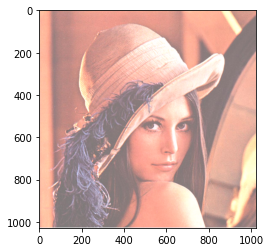

In [19]:
alpha = 1
beta = 100
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plt.imshow(new_image)
plt.show()

## Задание 6. Изменение контраста изображения
Контраст изменяется тем же образом, что и в предыдущем задании, но за счет использования параметра $\alpha$. Ниже сразу решение через функции OpenCV.

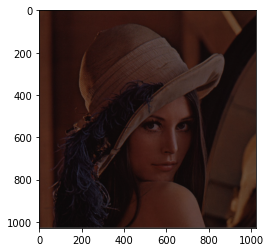

In [23]:
# должен быть всегда больше 0, если меньше 1 - контраст уменьшается, если больше - увеличивается
alpha = 0.4 
beta = 0
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plt.imshow(new_image)
plt.show()

## Задание 7. Гамма преобразование

Гистограмма - график распределения элементов изображения с различной интенсивностью. По оси абсцисс - интенсивость. По оси ординат - количество пикселей определенного цвета. 

Гамма преобразование используется для корректировки яркости картинки (интенсивности пикселей) при помощи нелинейного преобразования с помощью формулы, которая применяется к каждому каналу: 

$O = (\frac{I}{255})^\gamma \times 255$, где $I$ - интенсивность

Физически составляется таблица по этой формуле, а потом каждому пикселю (каждому каналу) присваиваем новое значение исходя из таблицы.

Если $\gamma < 1$, то темные места на картинке станут ярче, гистограмма будет смещена вправо, и наоборот при $\gamma > 1$.

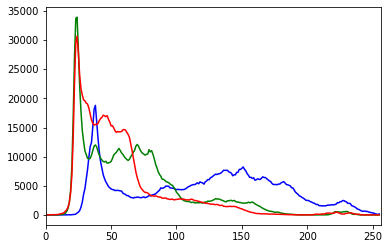

In [4]:
# гистограмма изображения до гамма преобразования
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

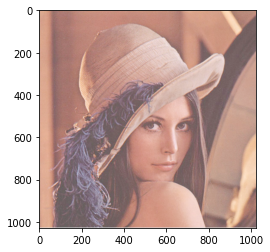

In [6]:
# гамма преобразование
gamma = 0.4

lookUpTable = np.empty((1, 256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

res = cv2.LUT(img, lookUpTable)


plt.imshow(res)
plt.show()

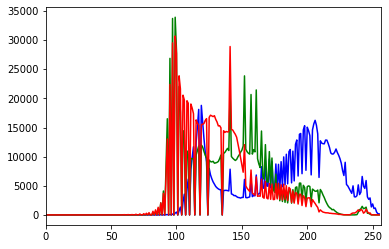

In [7]:
# гистограмма после применения гамма преобразования
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([res],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Скачки получаются из-за того, что не получаются некоторые интенсивности после преобразования.

## Задание 8. Гистограммная эквайлизация
Это преобразование призвано решить проблему, при которой в довольно много значений "скапливается" в узком диапазоне интенсивости. Если это скопление находится справа на гистограмме, то картинка получается достаточно бледной. Гамма коррекция сработает, однако для каждой картинки придется подирать свое значение $\gamma$.

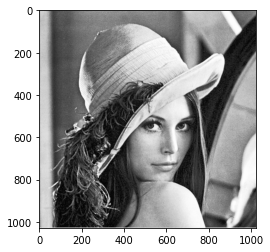

In [8]:
# преобразование
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

equ = cv2.equalizeHist(gray_img)

plt.imshow(equ, cmap = 'gray')
plt.show()

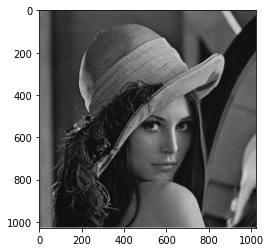

In [10]:
# картинка до преобразований
plt.imshow(gray_img, cmap = 'gray')
plt.show()

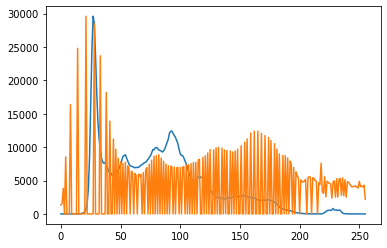

In [9]:
# сравнение гистограмм
histr = cv2.calcHist([gray_img],[0],None,[256],[0,256])
histr2 = cv2.calcHist([equ],[0],None,[256],[0,256])
plt.plot(histr)
plt.plot(histr2)

Заметим, что остались пиковые значения, но при этом наибольшие расстояния между пиками в тех точках, где до преобразования была наибольшая интенсивность.

Отличие от гамма преобразования - при гамма преобразовании мы не отталкиваемся от того, сколько пикселей с конкретной интенсивностью существует на изображении, все зависит от параметров. В то время как в этой преобразовании мы опираемся на количество пикселей с определенной интенсивностью.

## Задание 9. Перевод в grayscale
Существуют разные формулы для перевода изображения в оттенки серого:
$Y' = 0.299R + 0.587G + 0.114B$.  
Есть формула для учета особенностей человеческого глаза (чувствительность к синему и зеленому цвету):

$Y' = 0.2126R + 0.7152G + 0.722B$ 

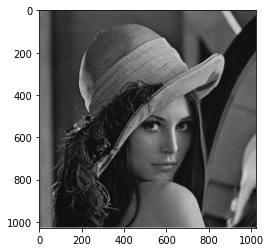

In [13]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,  cmap='gray')
plt.show()

## Задание 10. Canny edges на изображении
Задача - найти контуры на изображении. Есть способы нахождения контуров при помощи операторов Собеля и Лапласиана, однако контуры после них получаются слегка неоднородными. Неоднородность проявляется в толщине контуров и разрывах. Улучшение Лапласиана под названием Canny edge призвано решить эту проблему.

Это алгоритм, который состоит из нескольких этапов. Первый - перевод в оттенки серого. Второй - применение Лапласиана для определения контуров. Третий - преобразование границ. Преобразование границы заключается в прохождении по границе и выбор самых ярких пикселей на границе, включая их в новую границу. Далее происходит выравнивание границы, убираются неровности.

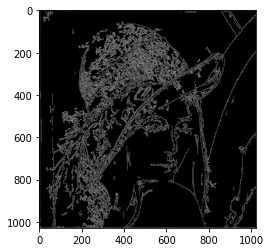

In [14]:
img_canny = cv2.Canny(img, 0, 100, 1)

plt.imshow(img_canny, cmap = 'gray', vmin=0, vmax=255)
plt